# k-Nearest Neighbor Classifier

**Problema**: Temos um banco de dados com 150 amostras (4 atributos/amostra) de 3 tipos de iridáceas (flores) diferentes. Queremos classificar essas flores através dos 4 atributos.

**Solução**: Utilizar o kNN para tentar classificar essas amostras.
- 2/3 do banco para treinamento e 1/3 para teste

## Sumário

1. [Imports and Settings](#Imports-and-Settings)
2. [Análise dos Dados](#Análise-dos-Dados)
3. [Distance Methods](#Distance-Methods)
4. [Classificador](#Classificador)
5. [Métrica de Erro](#Métrica-de-Erro)
6. [Treinamento e Validação](#Treinamento-e-Validação)
7. [Resultados](#Resultados)
8. [kNN do Scikit](#kNN-do-Scikit)

## Imports and Settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter

# Database
from sklearn.datasets import load_iris

%matplotlib inline
pd.options.display.max_rows = 10

/Users/arnaldo/miniconda3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Análise dos Dados

In [2]:
iris = load_iris()
print(iris.data.shape)
print(iris.target.shape)
print(iris.feature_names)
print(iris.target_names)

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['class'] = iris.target
df['class'] = df['class'].map({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]})
df

(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


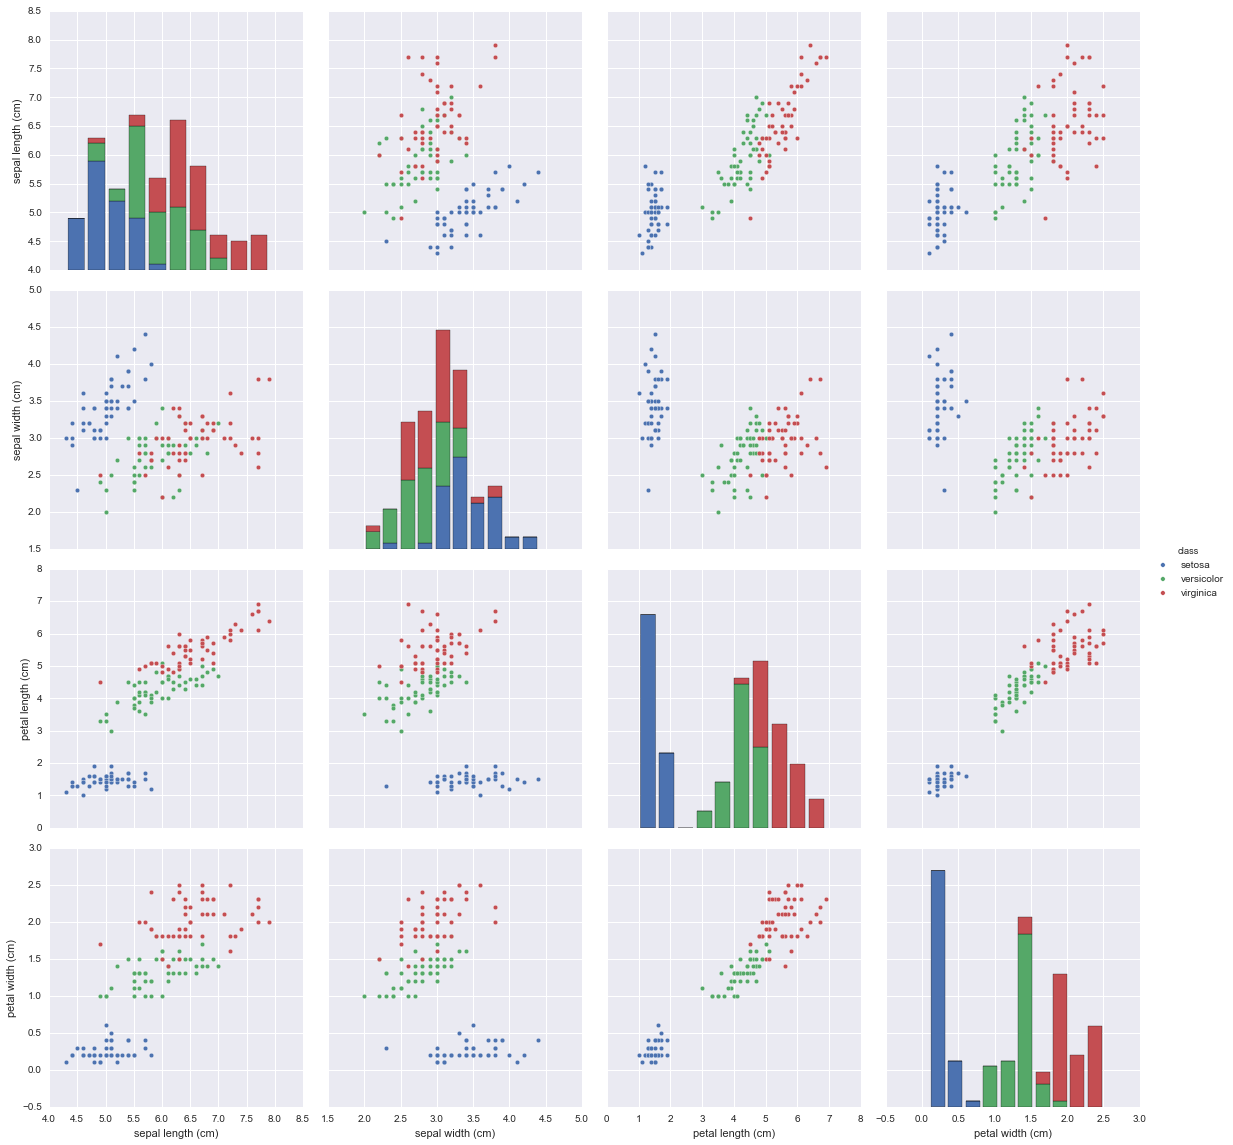

In [4]:
sb.pairplot(df, hue='class', size=4)

## Distance Methods

In [5]:
def l1_distance(a, b):
    """a is N X D where each row is an example. b is 1 X D. We will compare b against all examples in a."""
    return ( np.sum( np.abs(a - b), axis = 1 ) )

def l2_distance(a, b):
    return ( np.sqrt( np.sum((a - b) ** 2, axis = 1) ) )

# Teste dos métodos de distancia
x = np.array([[1,2,3],[4,5,6],[7,8,9]])
y = np.array([[2,3,4],[5,6,8]])

print(l1_distance(x, y[0,:]))
print(l1_distance(x, y[1,:]))

[ 3  6 15]
[13  4  5]


## Classificador

In [6]:
class kNearestNeighbor(object):
    def __init__(self):
        pass

    def train(self, x, y):
        """X is N x D where each row is an example. Y is 1-dimension of size N"""
        self.x_train = x
        self.y_train = y

    def predict(self, x, k=1, dist_func=l1_distance, draw_value=-1):
        """X is N x D where each row is an example we wish to predict label for"""
        num_test = x.shape[0]

        # lets make sure the output size matches the input
        y_pred = np.full(num_test, draw_value, dtype = self.y_train.dtype)

        # compute the k-nearest neighbours
        for i in range(num_test):
            distances = dist_func(self.x_train, x[i, :])
            nn_index = np.argsort(distances)
            nn_pred = self.y_train[nn_index[:k]]
            y_pred[i] = np.argmax(np.bincount(nn_pred))

        return y_pred

# teste do classificador
knn = kNearestNeighbor()
knn.train(x, np.array([0,1,2]))
y_pred = knn.predict(y, k=1)
print(y_pred)

[0 1]


## Métrica de Erro

In [7]:
def accuracy(y_pred, y_gt):
    """y_pred and y_gt (Nx1) contains the labels of predicted classes and GT for each sample"""
    return np.mean(y_pred == y_gt)

## Treinamento e Validação

In [8]:
index = range(df.shape[0])
val_idx = list(filter(lambda x: (x+1)%3 == 0, index)) # [2,5,8,...,146,149]
train_idx = list(set(index) - set(val_idx)) # [0,1,3,4,6,...,145,147,148]

train_x = df.ix[train_idx,0:4].values
train_y = df["class"].map({iris.target_names[0]:0, iris.target_names[1]:1, iris.target_names[2]:2})[train_idx].values

val_x = df.ix[val_idx,0:4].values
val_y = df["class"].map({iris.target_names[0]:0, iris.target_names[1]:1, iris.target_names[2]:2})[val_idx].values

print(np.bincount(train_y), np.bincount(val_y), sep='\n')

[34 33 33]
[16 17 17]


In [9]:
knn = kNearestNeighbor()
knn.train(train_x, train_y)
y_pred = knn.predict(val_x, k=1)

print('Acurácia: {:.2f}%'.format(accuracy(y_pred, val_y)))

Acurácia: 0.96%


## Resultados

In [10]:
k_values = pd.Series([1,3,5,7,9])
dist_f = [l1_distance, l2_distance]
df = pd.DataFrame(columns=[["k", "Dist. Func.", "acurácia"]])

aux = 0
for f in dist_f:
    for i in range(len(k_values)):
        y_pred = knn.predict(val_x, k_values[i], dist_func=f, draw_value=-1)
        df.loc[aux] = [k_values[i], f.__name__, accuracy(y_pred, val_y)]
        aux += 1

df

,k,Dist. Func.,acurácia
0,1.0,l1_distance,0.96
1,3.0,l1_distance,0.94
2,5.0,l1_distance,0.94
3,7.0,l1_distance,0.94
4,9.0,l1_distance,0.94
5,1.0,l2_distance,0.96
6,3.0,l2_distance,0.98
7,5.0,l2_distance,0.96
8,7.0,l2_distance,0.96
9,9.0,l2_distance,0.96


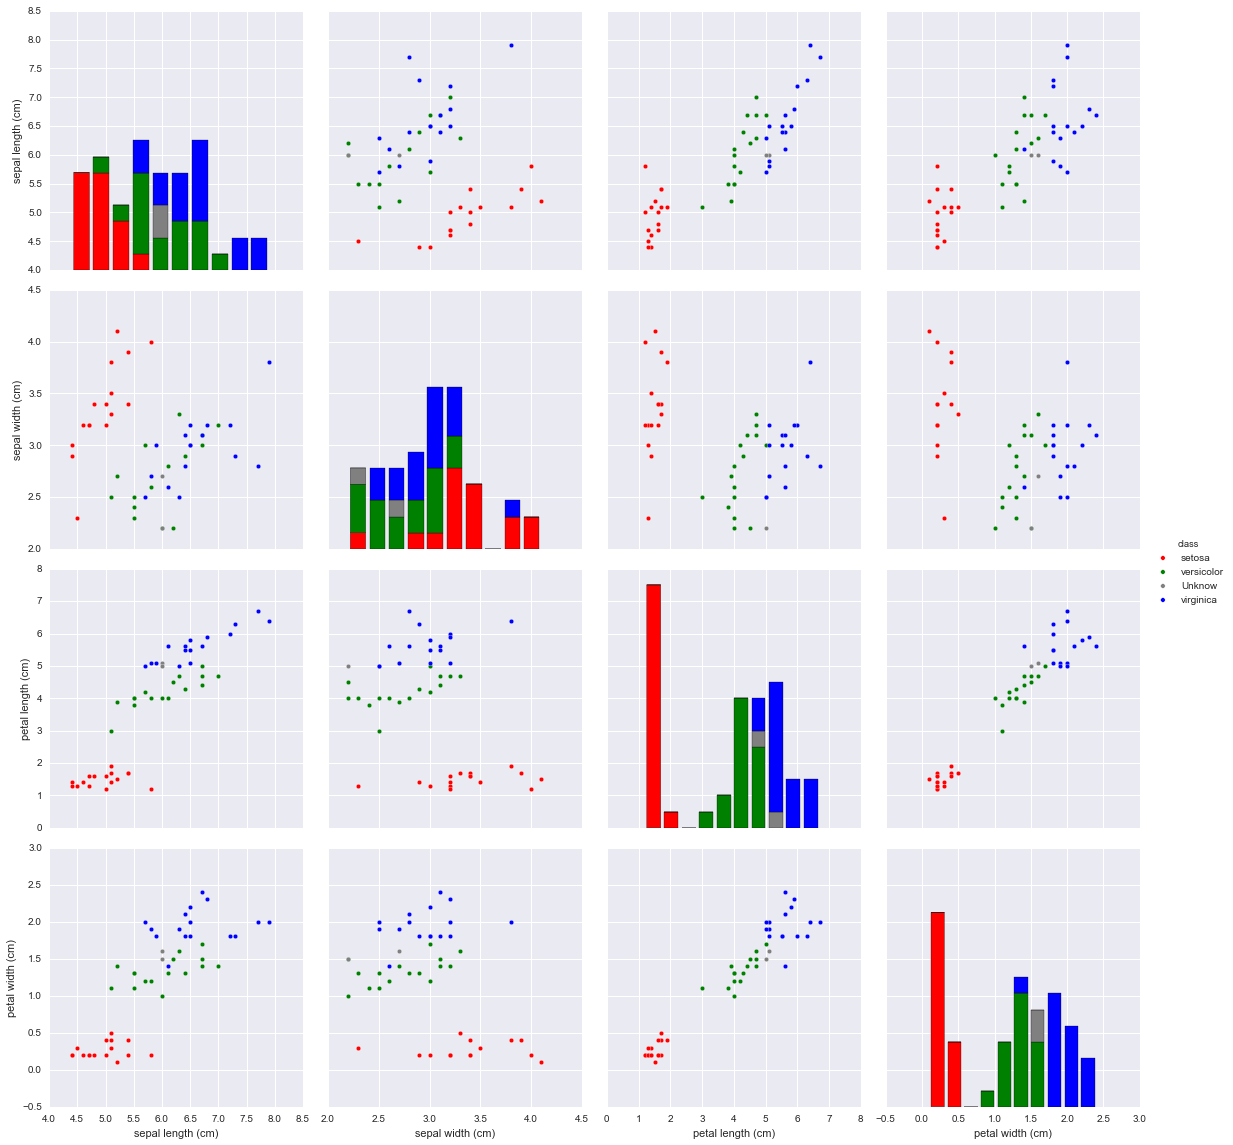

In [11]:
y_pred = knn.predict(val_x, k=1, dist_func=l2_distance, draw_value=-1)
res = (y_pred == val_y)
y_pred[res == False] = -1

df_val = pd.DataFrame(val_x, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
df_val['class'] = y_pred
df_val['class'] = df_val['class'].map({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2], -1:'Unknow'})

sb.pairplot(df_val, hue='class', size=4, palette=['red', 'green', 'gray', 'blue'])

## kNN do Scikit

In [17]:
from sklearn.neighbors import KNeighborsClassifier
for weights in ['uniform', 'distance']:
    knn = KNeighborsClassifier(n_neighbors=1, weights=weights)
    knn.fit(train_x, train_y)
    
    pred = knn.predict(val_x)
    
    print(weights, ': ', accuracy(pred, val_y), sep='')

uniform: 0.96
distance: 0.96


[Voltar ao topo](#k-Nearest-Neighbor-Classifier)